In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes = True)

In [2]:
df = pd.read_csv('NaiveBayesData.csv')
df.head()

,Feature_1,Feature_2,Target
0,0.733246,-1.431007,0
1,0.656043,0.842841,1
2,0.537983,-2.056550,0
3,1.289308,-0.079023,1
4,0.720124,0.977237,1


In [7]:
df.isnull().sum()

Feature_1    0
Feature_2    0
Target       0
dtype: int64

In [8]:
df_copy = df.copy(deep = True) 
df_copy[['Feature_1','Feature_2']] = df_copy[['Feature_1','Feature_2',]].replace(0,np.NaN)

# Showing the Count of NANs
print(df_copy.isnull().sum())

Feature_1    0
Feature_2    0
Target       0
dtype: int64


C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Feature_1'>

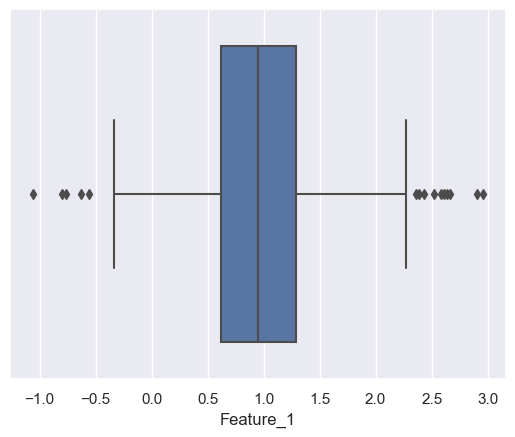

In [10]:
sns.boxplot(x=df["Feature_1"])

C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Feature_2'>

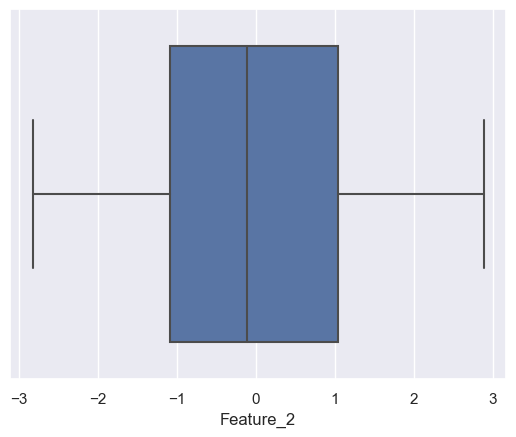

In [11]:
sns.boxplot(x=df["Feature_2"])

Target
0    150
1    150
Name: count, dtype: int64


C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


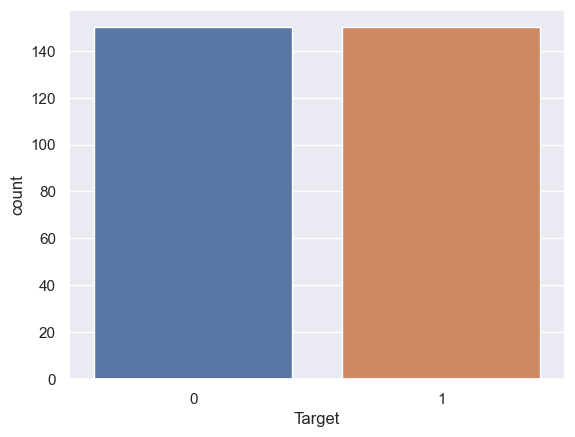

In [15]:
sns.countplot(data=df, x='Target')
print(df.Target.value_counts())

*Count is same therfore no need of resampling

In [17]:
X = df.drop('Target', axis=1)
y = df['Target']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

**Prediction and Evaluation**

In [20]:
y_pred = gnb.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
y_pred = gnb.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 98.33 %


In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.9841269841269841
Precision Score :  0.96875
Recall Score :  1.0


Text(0.5, 1.0, 'Accuracy Score: 98.33333333333333')

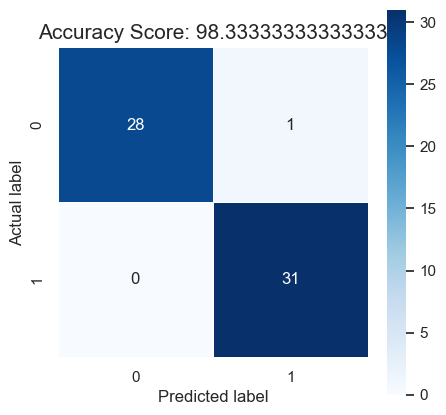

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(gnb.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

In [26]:
new_sample = [[0.5, -1.2]]

In [28]:
predicted_class = gnb.predict(new_sample)
print("\nPredicted class for new sample data point:", predicted_class[0])


Predicted class for new sample data point: 0


C:\Users\sjkar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


**Without normalization**
Accuracy: 98.33 %
Class predicted: 0

In [33]:
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,Feature_1,Feature_2,Target
0,-0.385933,-1.169428,-0.998332
1,-0.513068,0.679504,0.998332
2,-0.707485,-1.678076,-0.998332
3,0.529772,-0.070090,0.998332
4,-0.407541,0.788786,0.998332


Normalization is not required as the original data are already categorical with ) or 1 as Target 